In [158]:
# Importing the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set(color_codes= True)
os.chdir(r'/Users/a0s04np/ML/')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#<b>Reading the data from CSV file</b>

In [140]:
df_bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_bank.head()
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<b>Check of there is any null value, remove if any

In [141]:
df_bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<b>Change the column education with actual values and turn the column to dummies for better understanding 

In [142]:
df_bank.Education = df_bank.Education.replace(1, 'Undergraduate')
df_bank.Education = df_bank.Education.replace(2, 'Graduate')
df_bank.Education = df_bank.Education.replace(3, 'Advanced')
df_bank = pd.get_dummies(df_bank, columns=['Education'])
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergraduate
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


#<b>Checking into the statstical distribution of the data

In [143]:
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


#<b> Followings are the outcome of data in above table
1. Columns ID, ZIP code and Online are not required for the analysis
2. There are negative values in experience which seems mistake in collecting the data
3. There is not much difference in mean and the median of the columns Age, Experience and Family which means data is equally distribute among these columns.

#<b>To deal with negative values in Experience, replace them with median of Experience

In [144]:
df_bank[df_bank.Experience < 0 ].ID.count()

52

In [145]:
df_bank[df_bank.Experience < 0 ].ID.head()

89      90
226    227
315    316
451    452
524    525
Name: ID, dtype: int64

In [146]:
df_bank[df_bank.ID == 90]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergraduate
89,90,25,-1,113,94303,4,2.3,0,0,0,0,0,1,1,0,0


In [147]:
med_val = df_bank.Experience.median()
df_bank.loc[df_bank['Experience'] < 0, 'Experience'] = med_val


In [148]:
df_bank[df_bank.ID == 90] #Comparison shows that the values has been replaced perfectly

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergraduate
89,90,25,20.0,113,94303,4,2.3,0,0,0,0,0,1,1,0,0


<b>Drop the columnes which are not required for analysis

In [149]:
df_bank = df_bank.drop(labels='ID', axis=1)
df_bank = df_bank.drop('Online', axis =1)
df_bank = df_bank.drop('ZIP Code', axis =1)
df_bank.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard,Education_Advanced,Education_Graduate,Education_Undergraduate
0,25,1.0,49,4,1.6,0,0,1,0,0,0,0,1
1,45,19.0,34,3,1.5,0,0,1,0,0,0,0,1
2,39,15.0,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9.0,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8.0,45,4,1.0,0,0,0,0,1,0,1,0


#<b>Data Analysis

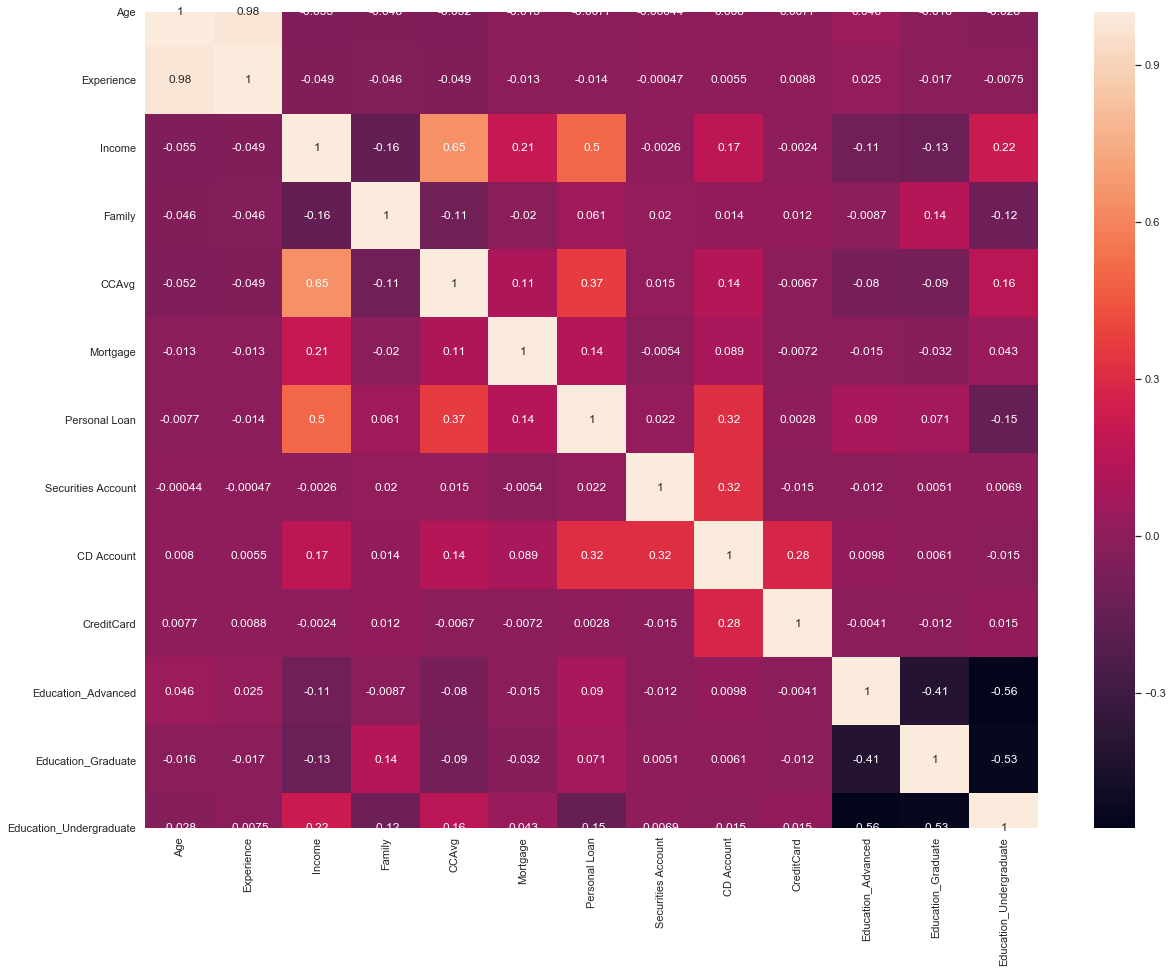

In [150]:
plt.figure(figsize=(20,15))
sns.heatmap(df_bank.corr(), annot=True)


#<b>The heatmap above, shows that there is very good correlation between Personal Loan(our target column), Income and CD account

4#<b> Spilit the data into training and test data.


In [154]:
x = df_bank.drop(['Personal Loan'], axis=1)
y = df_bank['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state =1 )

#<b> Logistic Regression model to predict the likelihood of a customer buying personal loans

In [159]:
reg_model = LogisticRegression(solver='liblinear')
reg_model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
y_predict = reg_model.predict(x_test)
coef_df = pd.DataFrame(reg_model.coef_)
coef_df['intercept'] = reg_model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.071246  0.06526  0.049873  0.450173  0.173375  0.000823 -0.773756   

          7         8         9        10        11  intercept  
0  2.837498 -0.810028 -0.640684 -0.730337 -4.076419   -5.44744  


In [170]:
model_score = reg_model.score(x_test, y_test)
print('The score for model is:{}'.format(model_score))

The score for model is:0.9566666666666667


#<b> Confusion Matrix

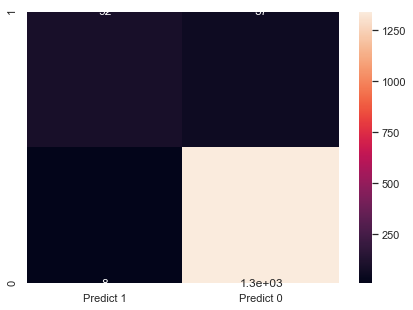

In [171]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)